**DTSA 5509 Final Project**



**Project Topic and Goals**

The topic of this project is survival outcomes in the setting of hepatitis. This is fundamentally a supervised learning problem with the goal being classification. More specifically, the goal in this project is the use the available data to classify a patient into either the "Live" group or "Die" group. So, more plainly, the goal is to predict if a given patient with hepatitis will live or die based on the data available. In addition to acheiving the maximum possible prediction accuracy for classifying these patients, a secondary goal is to understand which factors (features) are the strongest contributors to whether a patient is classified as living or dying.    

**Data Source** 

The data used in this project was obtained from the popular [UCI Machine Learning Repository](https://archive.ics.uci.edu/) The UCI Repository has created a python package/library that can be used to access these datasets and that is what is installed below and used to access/gather the data. 

Citation: Hepatitis. (1988). UCI Machine Learning Repository. https://doi.org/10.24432/C5Q59J.

In [1]:
# Installing package to get data 

#%pip install ucimlrepo

# %pip is the magic command that will install into the current kernel (rather than into the instance of Python
# that launched the notebook)



In [2]:
# Importing Dataset 

from ucimlrepo import fetch_ucirepo

# fetch dataset 

hepatitis = fetch_ucirepo(id=46)

In [3]:
# Importing necessary packages 


import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
hepatitis

{'data': {'ids': None,
  'features':      Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
  0     30    2      1.0           2      2.0      2.0       2.0        1.0   
  1     50    1      1.0           2      1.0      2.0       2.0        1.0   
  2     78    1      2.0           2      1.0      2.0       2.0        2.0   
  3     31    1      NaN           1      2.0      2.0       2.0        2.0   
  4     34    1      2.0           2      2.0      2.0       2.0        2.0   
  ..   ...  ...      ...         ...      ...      ...       ...        ...   
  150   46    1      2.0           2      1.0      1.0       1.0        2.0   
  151   44    1      2.0           2      1.0      2.0       2.0        2.0   
  152   61    1      1.0           2      1.0      1.0       2.0        1.0   
  153   53    2      1.0           2      1.0      2.0       2.0        2.0   
  154   43    1      2.0           2      1.0      2.0       2.0        2.0   
  
       Liver F

In [5]:
# Putting data into a Pandas dataframe and checking the shape of the dataframe 

df_hepatitis = hepatitis.data.original

df_hepatitis.shape 


(155, 20)

In [6]:
df_hepatitis.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [7]:
print(hepatitis.metadata.additional_info.variable_info)

     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

The BILIRUBIN attribute appears to be continuously-valued.  I checked this with the donater, Bojan Cestnik, who replied:

 About the hepatitis database and BILIRUBIN problem I would like to say the following: BILIRUBIN is continuous attribute (= the number of it's "values" in the ASDOHEPA.DAT file is negativ

In [8]:
print(hepatitis.variables)

               name     role         type demographic description units  \
0             Class   Target  Categorical        None        None  None   
1               Age  Feature      Integer        None        None  None   
2               Sex  Feature  Categorical        None        None  None   
3           Steroid  Feature  Categorical        None        None  None   
4        Antivirals  Feature  Categorical        None        None  None   
5           Fatigue  Feature  Categorical        None        None  None   
6           Malaise  Feature  Categorical        None        None  None   
7          Anorexia  Feature  Categorical        None        None  None   
8         Liver Big  Feature  Categorical        None        None  None   
9        Liver Firm  Feature  Categorical        None        None  None   
10  Spleen Palpable  Feature  Categorical        None        None  None   
11          Spiders  Feature  Categorical        None        None  None   
12          Ascites  Feat

In [9]:
df_variable_descriptions = hepatitis.variables 

num_categorical = (df_variable_descriptions['type'] == 'Categorical').sum()

num_numeric = ((df_variable_descriptions['type'] == 'Integer') | 
               (df_variable_descriptions['type'] == 'Continuous')).sum()

print(f'There are {num_categorical -1} categorical features and {num_numeric} numeric features (1 continuous and 6 Integer).')



There are 12 categorical features and 7 numeric features (1 continuous and 6 Integer).


**Data Description**

Data size: Including the target column, this dataset has 155 rows and 20 columns. 19 of the columns are feature columns. 

There are 12 categorical features and 7 numeric features (1 continuous and 6 Integer).


**Data Cleaning**

To Do:

- Columns with Missing Values are indicated above in the "missing_values" column of the variables dataframe. 
    - Decide how to handle missing values in each column with missing values 

In [10]:
# First, I want to see how many missing values are in each of the columns that are indicated to have 
# missing values 


df_hepatitis.isna().sum()

Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64

In [11]:
# From the above, I see that there are 4 columns with only one missing value (Steroid, Fatigue, Malaise,
# and Anorexia. Given the number of rows I have plus the fact that these are cateogrical variables,
# I'm going to take the approach of just dropping the rows with missing values 

columns_with_one_missing_value = df_hepatitis.columns[df_hepatitis.isna().sum() == 1]

df_hepatitis_clean = df_hepatitis.dropna(subset = columns_with_one_missing_value)

df_hepatitis_clean.isna().sum()

Class               0
Age                 0
Sex                 0
Steroid             0
Antivirals          0
Fatigue             0
Malaise             0
Anorexia            0
Liver Big           9
Liver Firm         10
Spleen Palpable     4
Spiders             4
Ascites             4
Varices             4
Bilirubin           5
Alk Phosphate      28
Sgot                3
Albumin            15
Protime            66
Histology           0
dtype: int64

In [12]:
# I Want to check to see how many in each class I have left to make sure I don't lose too many of either class 

target_class_counts = df_hepatitis_clean['Class'].value_counts()

# Display the counts
print(target_class_counts)

# Calculate the percentage of observations for each class
target_class_percentage = df_hepatitis_clean['Class'].value_counts(normalize=True) * 100

# Display the percentage
print(target_class_percentage)

# 2 = Live 

#1 = Die 

df_hepatitis_clean.dtypes


2    121
1     32
Name: Class, dtype: int64
2    79.084967
1    20.915033
Name: Class, dtype: float64


Class                int64
Age                  int64
Sex                  int64
Steroid            float64
Antivirals           int64
Fatigue            float64
Malaise            float64
Anorexia           float64
Liver Big          float64
Liver Firm         float64
Spleen Palpable    float64
Spiders            float64
Ascites            float64
Varices            float64
Bilirubin          float64
Alk Phosphate      float64
Sgot               float64
Albumin            float64
Protime            float64
Histology            int64
dtype: object

In [13]:
# Filtering for categorical


# Identify categorical columns
categorical_columns = df_variable_descriptions[df_variable_descriptions['type'] == 'Categorical']['name'].tolist()

print(categorical_columns)

['Class', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices']


In [14]:
# Filtering for numeric columns 

# Identify numeric columns 

numeric_columns = df_variable_descriptions[df_variable_descriptions['type'].isin(['Integer', 'Continuous'])]['name'].tolist()

print(numeric_columns)



['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime', 'Histology']


In [15]:
# Imputing the mode for the remaining categorical variables with missing values 



# Create a SimpleImputer instance for categorical columns with 'most_frequent' strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the DataFrame
df_hepatitis_clean[categorical_columns] = categorical_imputer.fit_transform(df_hepatitis_clean[categorical_columns])

# Display the DataFrame after imputing the mode
df_hepatitis_clean

df_hepatitis_clean.isna().sum()

/var/folders/g_/gr9skh4j1ss5jtj3c1slx58w0000gn/T/ipykernel_28758/771918245.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hepatitis_clean[categorical_columns] = categorical_imputer.fit_transform(df_hepatitis_clean[categorical_columns])


Class               0
Age                 0
Sex                 0
Steroid             0
Antivirals          0
Fatigue             0
Malaise             0
Anorexia            0
Liver Big           0
Liver Firm          0
Spleen Palpable     0
Spiders             0
Ascites             0
Varices             0
Bilirubin           5
Alk Phosphate      28
Sgot                3
Albumin            15
Protime            66
Histology           0
dtype: int64

In [16]:
# Imputing the median for numeric/integer variables with missing values 


# Create a SimpleImputer instance for numeric columns with 'median' strategy
numeric_imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the DataFrame for numeric columns
df_hepatitis_clean[numeric_columns] = numeric_imputer.fit_transform(df_hepatitis_clean[numeric_columns])

# Display the DataFrame after imputing missing values with median for numeric columns
# print(df_hepatitis_clean)

df_hepatitis_clean.isna().sum()

/var/folders/g_/gr9skh4j1ss5jtj3c1slx58w0000gn/T/ipykernel_28758/970244632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hepatitis_clean[numeric_columns] = numeric_imputer.fit_transform(df_hepatitis_clean[numeric_columns])


Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
dtype: int64

In [17]:
# Now that all of the missing values have been taken care of, I want to again check the balance of the 
# target variable 

target_class_counts = df_hepatitis_clean['Class'].value_counts()

# Display the counts
print(target_class_counts)

# Calculate the percentage of observations for each class
target_class_percentage = df_hepatitis_clean['Class'].value_counts(normalize=True) * 100

# Display the percentage
print(target_class_percentage)

2.0    121
1.0     32
Name: Class, dtype: int64
2.0    79.084967
1.0    20.915033
Name: Class, dtype: float64


**Data Cleaning Summary**

In summary, I decided to drop the observations in which there was only 1 missing value in some columns. Next, I decided to impute the missing values in the categorical columns with the mode and to impute the missing values in the numeric/integer columns with the median. 

One important thing to note here is that the number of missing values in the Protime columns was relatively large, however, I hypothesized that the in the current analysis dropping it completely would result in the loss of too much information. However, if time allowed or in a future version, it may be prudent to try the analysis and modeling both ways. 

**Exploratory Data Analysis**

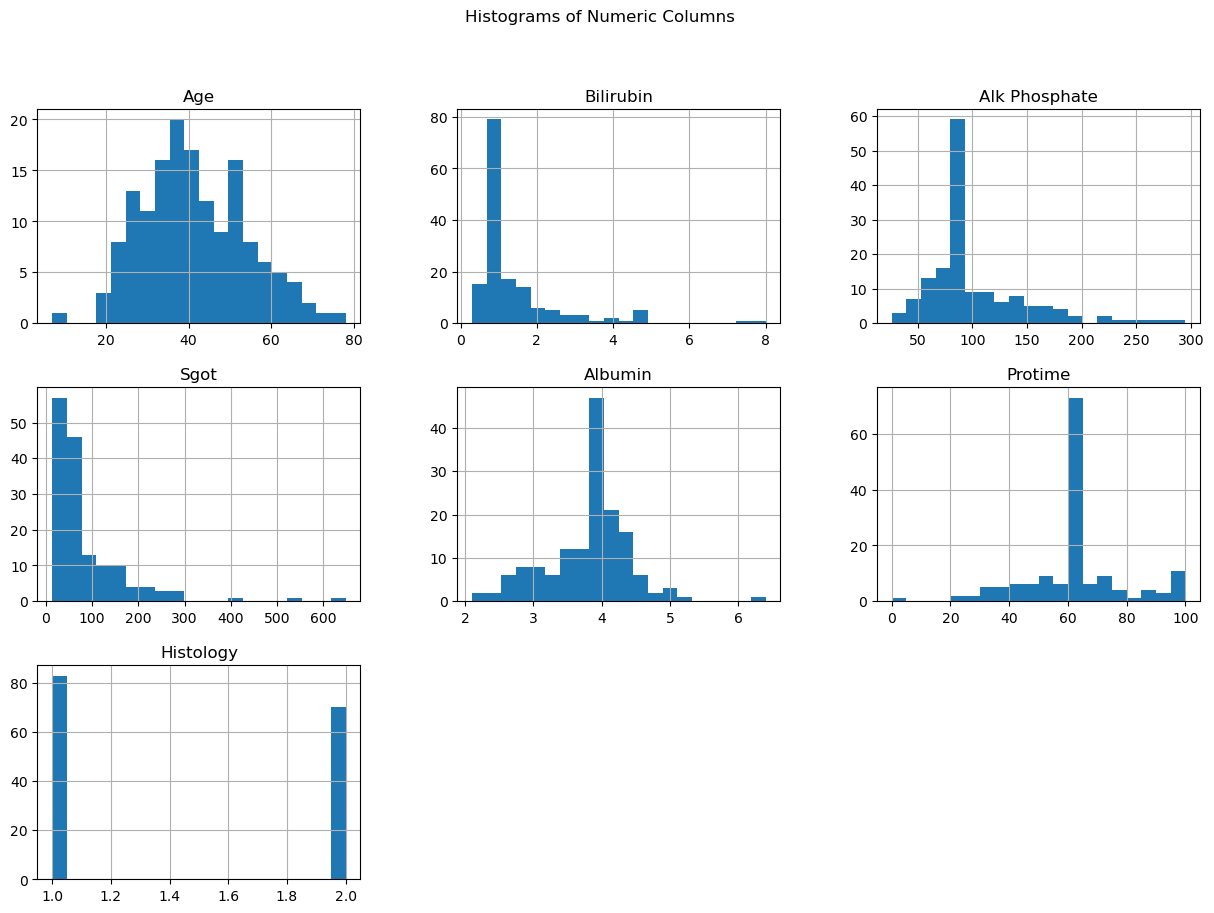

In [18]:
# First I want to make histograms of the numerical variables


# Create histograms for each numeric column
df_hepatitis_clean[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()


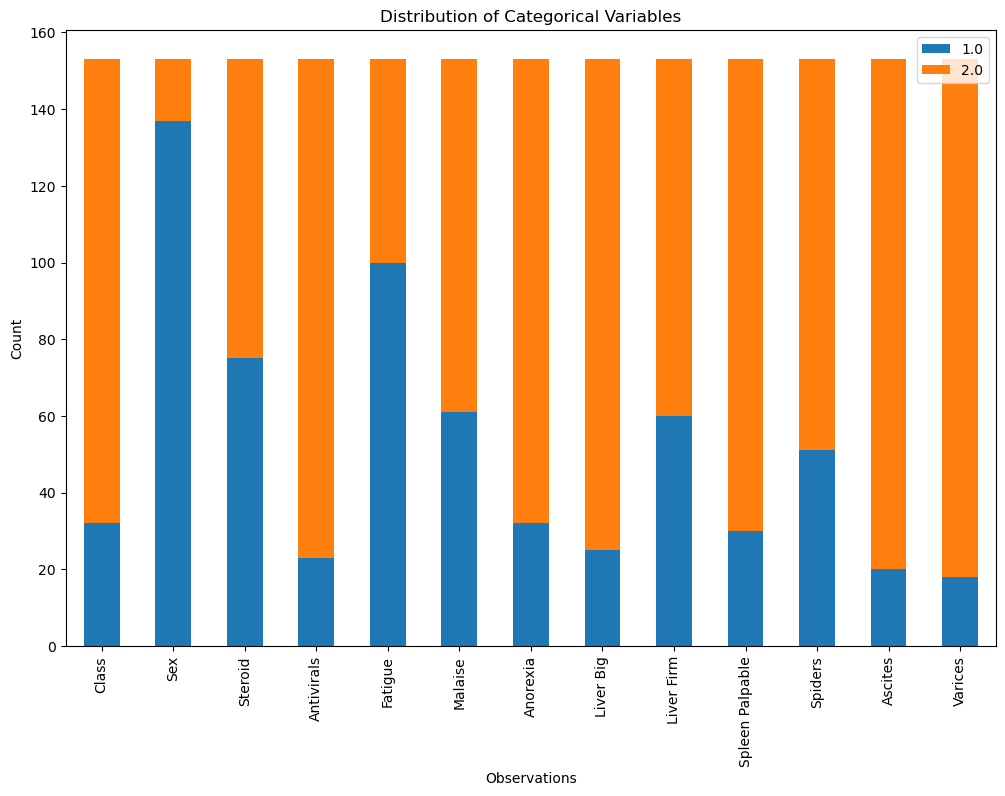

In [19]:
# Next I want to visualize the distribution of the categorical variables 

# Count the occurrences of each category
category_counts = df_hepatitis_clean[categorical_columns].apply(lambda x: x.value_counts()).T

# Plot bar charts for each categorical variable
category_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Categorical Variables')
plt.xlabel('Observations')
plt.ylabel('Count')
plt.show()



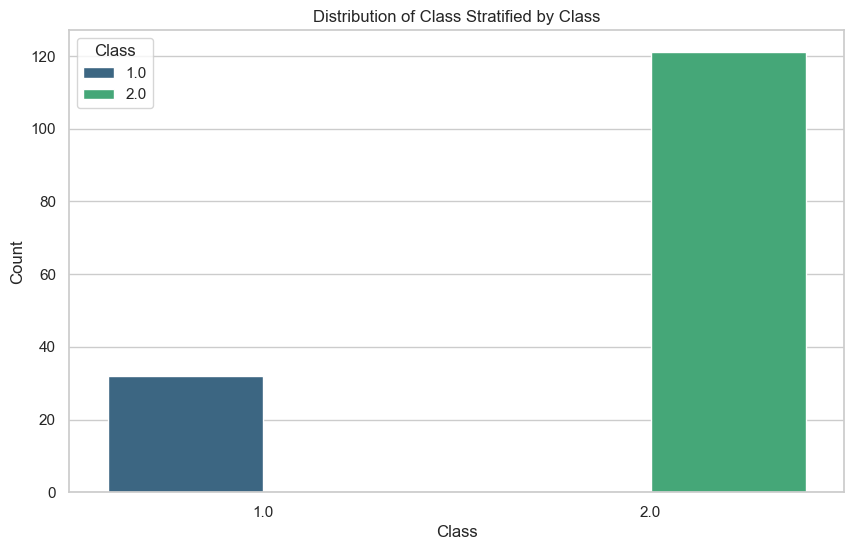

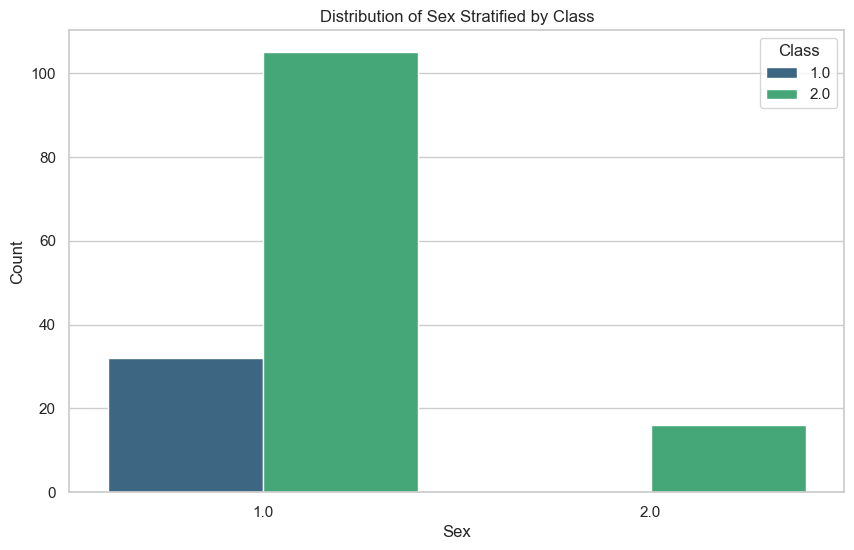

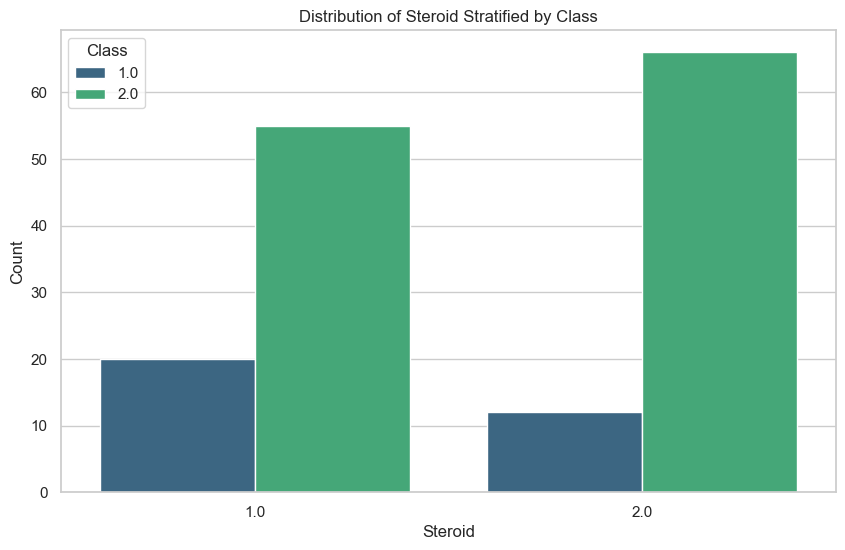

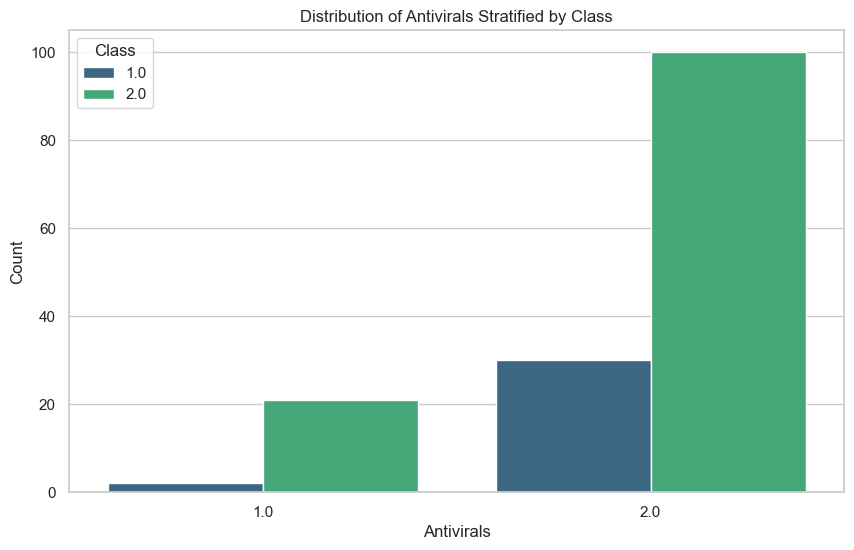

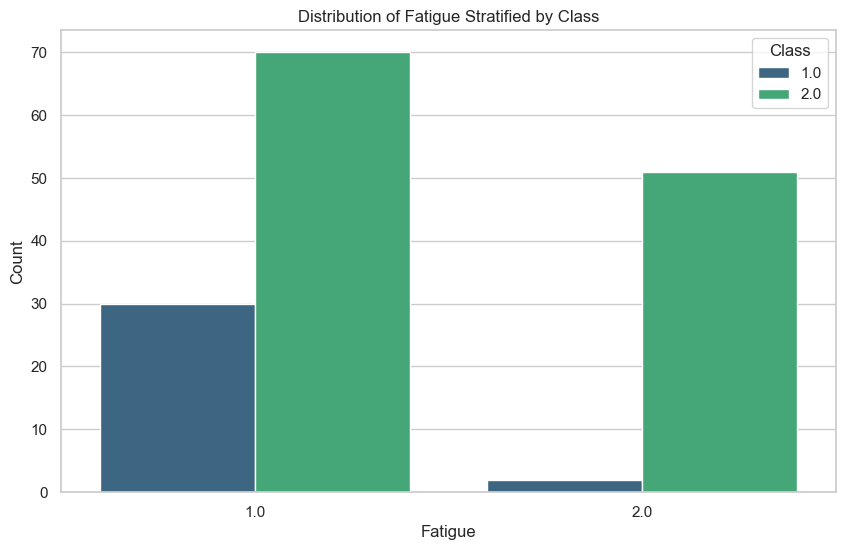

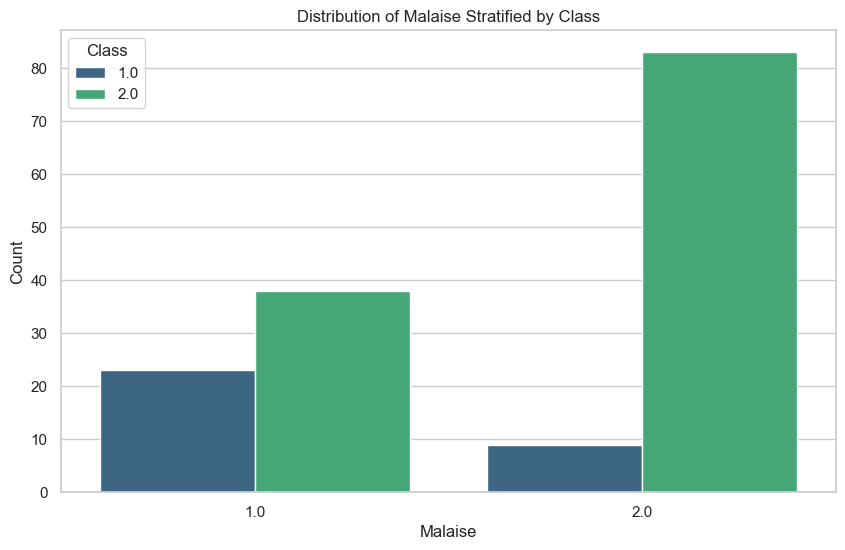

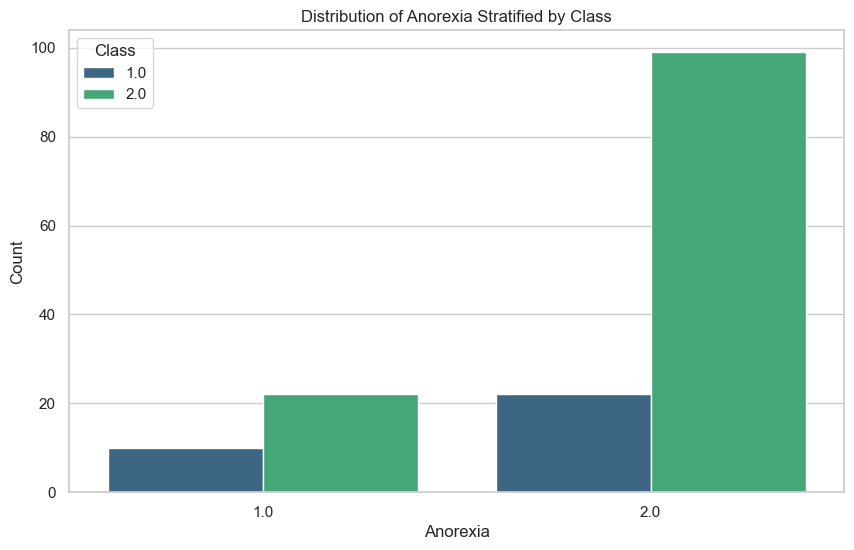

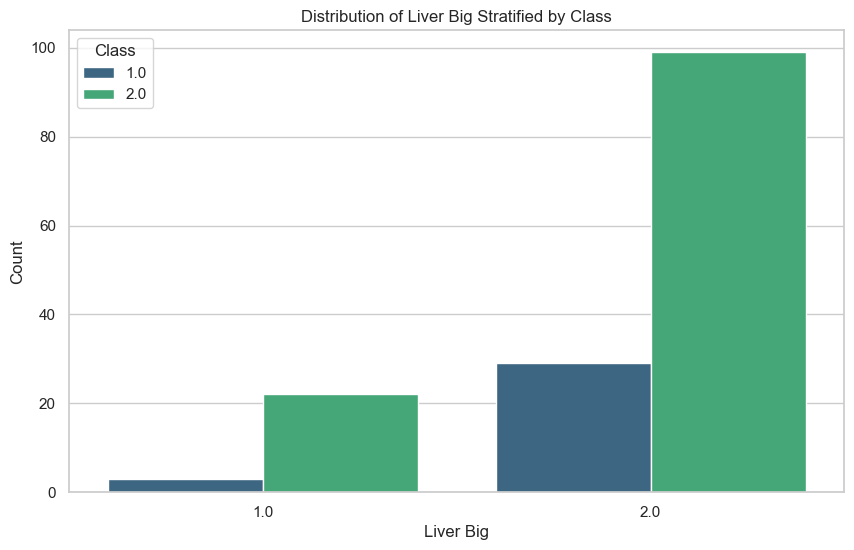

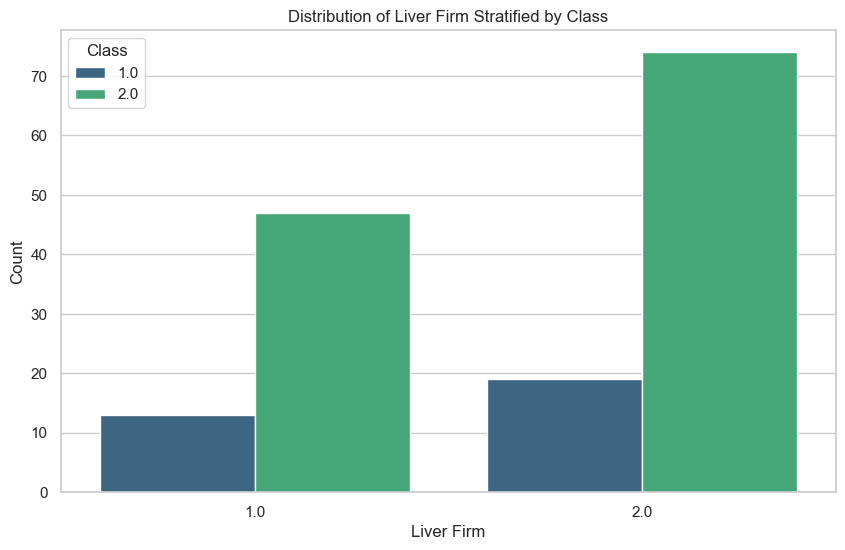

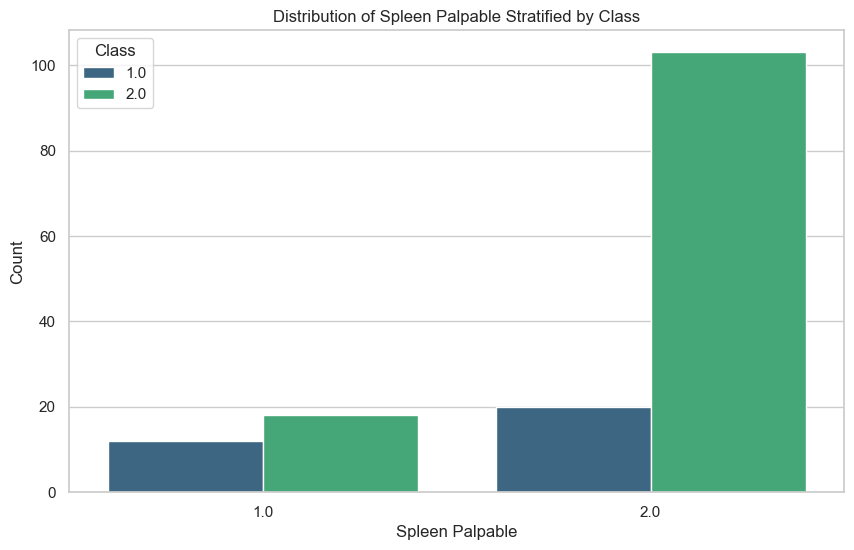

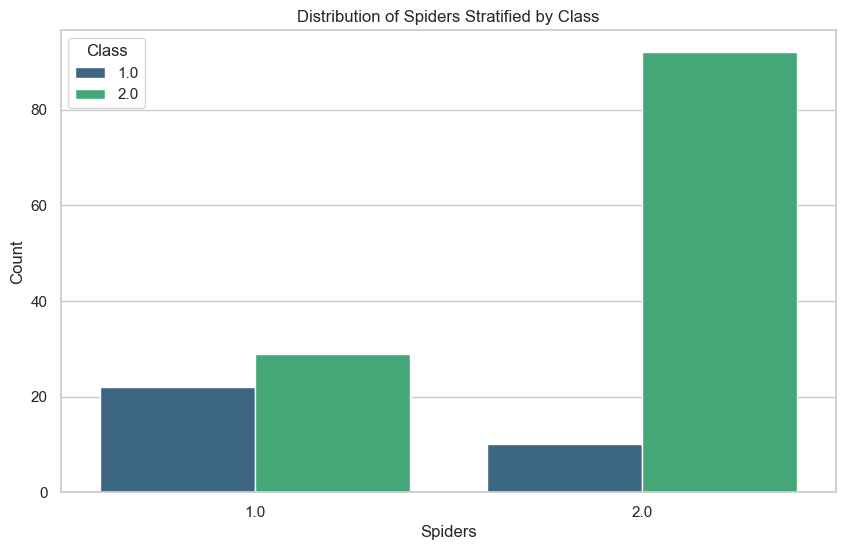

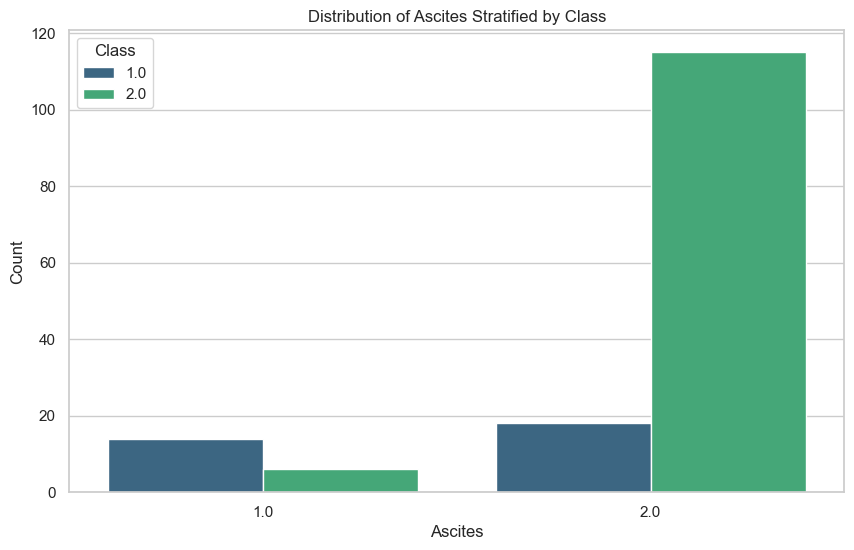

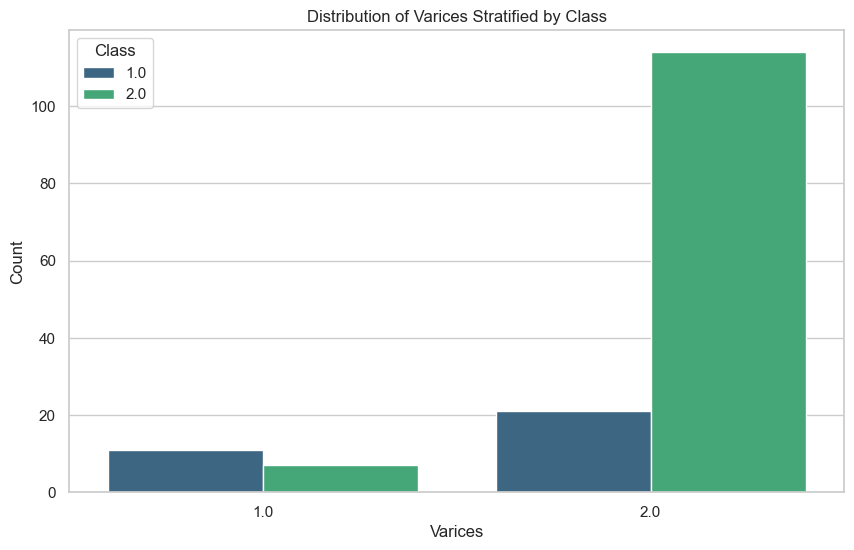

In [20]:


# Set the style for seaborn
sns.set(style="whitegrid")

# Plot count plots for each categorical variable stratified by class
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Class', data=df_hepatitis_clean, palette='viridis')
    plt.title(f'Distribution of {column} Stratified by Class')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Class')
    plt.show()


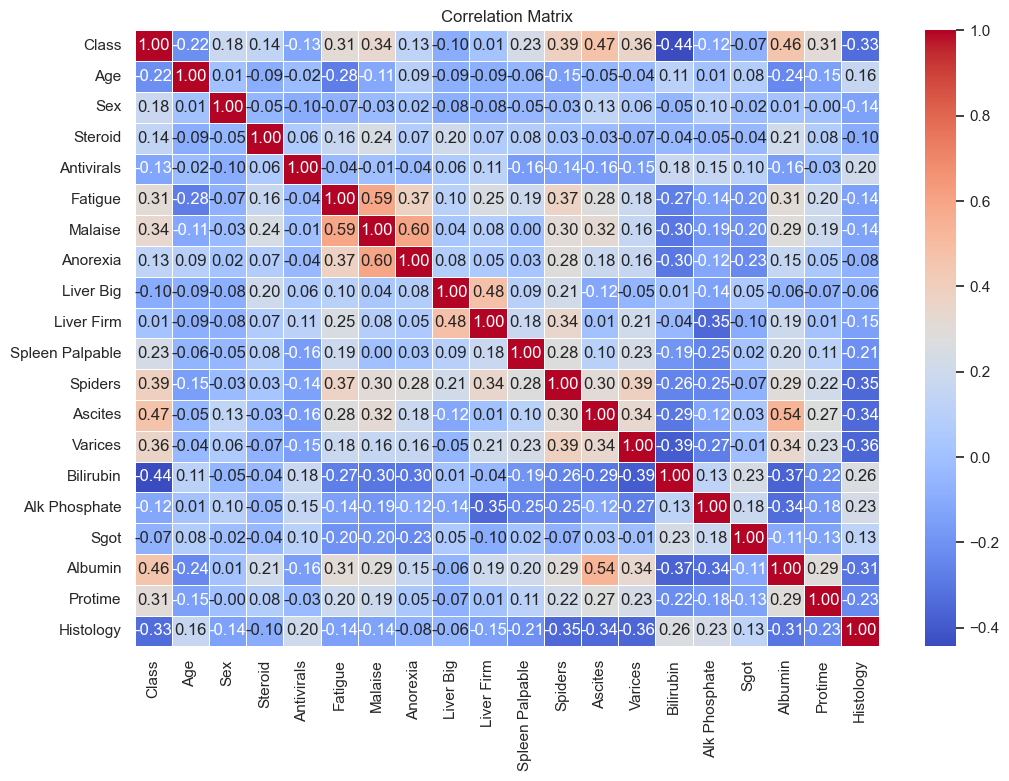

In [21]:
# Next I want to look at a correlation matrix 



# Compute the correlation matrix
correlation_matrix = df_hepatitis_clean.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


**Analysis of the Correlation Matrix** 

Here the columns Fatigue, Malaise, and Anorexia seem to more highly correlated than any other combination of columns. This isn't surprising since all 3 of these related symptoms/conditions. This is important to know since this may point to some multicollinearity that should be accounted for when modeling. 

Additionally Albumin and Ascites are moderately correlated which, again, is not surprising since higher Albumin is generally indicative of higher risk for Ascites. Both of these appear to be moderately correlated with Class, suggesting that they may be strongly predicitve. 

**Exploratory Data Analysis Summary**

In summary, this simple EDA points out some important things concerning the data: the numeric variables are not normally distributed (with the exception of age, potentially), there is expected variation in the distribution of the categorical variables, and there is some evidence of multicollinearity. 

From glancing at the categorical variables stratified by class, it seems that the presence of symptoms is overrepresented in the group of patients that died. 


**Model Building**

In [22]:
# Logistic Regression Model 

# Here I want to build a logistic regression model as a baseline with the assumption that it will not be the
# best perfroming model 



# Separate features (X) and target variable (y)
X = df_hepatitis_clean.drop('Class', axis=1)
y = df_hepatitis_clean['Class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5509)

# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=5509)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.81

Confusion Matrix:
[[ 2  3]
 [ 3 23]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.40      0.40      0.40         5
         2.0       0.88      0.88      0.88        26

    accuracy                           0.81        31
   macro avg       0.64      0.64      0.64        31
weighted avg       0.81      0.81      0.81        31



In [23]:
# Support Vector Machine Model 


# Here I want to see if a Support Vector Machine Model performs better than the Logistic Regression Model 


# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=5509)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.81

Confusion Matrix:
[[ 2  3]
 [ 3 23]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.40      0.40      0.40         5
         2.0       0.88      0.88      0.88        26

    accuracy                           0.81        31
   macro avg       0.64      0.64      0.64        31
weighted avg       0.81      0.81      0.81        31



In [24]:
# Above, and SVM using a linear kernel performs the exact same as the Logistic Regression Model 

# Next I want to switch the kernel type to rbf to see if model performance improves. 




# Initialize the SVM model
svm_model_2 = SVC(kernel='rbf', random_state=5509)

# Fit the model on the training data
svm_model_2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_2 = svm_model.predict(X_test)

# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred)
conf_matrix_2 = confusion_matrix(y_test, y_pred)
class_report_2 = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy_2:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_2)
print("\nClassification Report:")
print(class_report_2)


Accuracy: 0.81

Confusion Matrix:
[[ 2  3]
 [ 3 23]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.40      0.40      0.40         5
         2.0       0.88      0.88      0.88        26

    accuracy                           0.81        31
   macro avg       0.64      0.64      0.64        31
weighted avg       0.81      0.81      0.81        31



In [25]:
# Accuracy Improved, but I want to check one more approach to see if it can be improved further 


# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=5509)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.87

Confusion Matrix:
[[ 2  3]
 [ 1 25]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.40      0.50         5
         2.0       0.89      0.96      0.93        26

    accuracy                           0.87        31
   macro avg       0.78      0.68      0.71        31
weighted avg       0.86      0.87      0.86        31



In [26]:
# Accuracy Improved again. 

# Finally, I want to try Gradient Boosting 


# Initialize the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(n_estimators=500, random_state=5509)

# Fit the model on the training data
gradient_boosting.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.87

Confusion Matrix:
[[ 1  4]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.20      0.33         5
         2.0       0.87      1.00      0.93        26

    accuracy                           0.87        31
   macro avg       0.93      0.60      0.63        31
weighted avg       0.89      0.87      0.83        31



**Results and Analysis**


The results of each model can be seen after each model; this includes the accuracy, the confusion matrix, and the classification report.

Moving through the chosen models, the primary measure, accuracy, improved, It started at 81% for the logistic regression model and then stayed the same for the SVM model with the linear kernel. Next, I tried an SVM model with and rbf kernel and the accuracy improved to 84%. Here the other metrics come into consideration. Precision and F1 scores dropped here. This is important consider given that the class I am attempting to predict is not balanced. 

Moving from the SVM model with the rbf kernel to the random forest model, accuracy again improved from 84% to 87% and, importantly, precision, recall, and F1 scores improved. 

With the gradient boosing model, accuracy did not increase, instead it stayed the same at 87%. Decreases were seen in the other metrics, so based on the modeling approaches in this project, the random forest model seems to be the best approach. 

**Discussion and Conclusion**

I definitely learned a great deal from this project. The biggest takeaway for me is how iterative the modeling process is. After creating each model, I thought of another modeling approach that may be better or a hyperparameter that could be tuned to improve performance. Looking at the performance also was suggestive of other preprocessing steps that could also contribute to improving model performance.

The SVM model with the linear kernel didn't work (with "work" defined as offer improvement over the Logistic Regression model) because keeping the default linear boundary in the SVM is extremely similar to the approach of the logistic regression model. These apporaches were too similar to result in any significant improved performance, however, switching the kernel to the rbf kernel allowed for a nonlinear approach and improved performance. 

To improve this project, one consideration might be taking a different approach to missing values and imputation. For example, there were a large number of missing values for the Protime variable which were imputed with the median. I chose to impute here because dropping 66 observations seems like too many observations to lose. However, the distribution of this variable is quite wide, so using the median may not have been the best approach. A more sophisticated approach to this (perhaps using the other variables to predict Protime) may have resulted in a better model performance across all of the models I tried. 